In [1]:
# Importacao do DF
#Analise de tamanho e estrutura do DF
#observação e remocao de NAs

# Variaveis qualitativas
    #principais medidas estatisticas 
    # graficos
    #ordenação variavel

#variaveis quantitativas
    #grafico para analise das variaveis
    # identificação padrão indesejado em native-country, capital-gain e capital-loss

#Associacao 
    # associação variaveis quantitativas
    #aassocicao variaveis qualitativas

#


In [2]:
# Importação das bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt 
from matplotlib import colors 
from scipy.stats import normaltest
import seaborn as sns

import random


# PRIMEIRA FASE

In [3]:
#Importação do dataset 
DF = pd.read_csv("adult.csv") # DF = DataSet
DF.shape

(48842, 15)

In [4]:
DF

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# A base de dados utiliza o simbolo de '?' para representar valores faltantes
# Para a adequada análise e exploração, o valor '?' será substituído pelo valor padrão de valores faltante do python
DF=DF.replace(to_replace="?", value=np.nan)
# Informações gerais sobre a base de dados
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
DF.isnull().sum() 

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
#Verificar qual será o impacto da remoção dos Nas da base
DF2=DF # DF2 Variavel temporaria
DF2=DF2.dropna()
print (round(((1-(DF2.shape[0]/DF.shape[0]))*100),2),"%", "dos dados serão removidos com a remoção dos NAs")

#A remoção dos NAS terá um impacto de aproximadamente 7.4% da base. Esse valor, no cenário de análise, não é significativo
#Por isso, removeremos os NAs da base


7.41 % dos dados serão removidos com a remoção dos NAs


In [8]:
# Eliminação dos NAs do DataSet

DF=DF2
del DF2 # Eliminacao da variavel temporaria
DF.shape

(45222, 15)

In [9]:
cores_grafico = ['blue', 'green', 'red', 'DarkCyan', 'Sienna','DarkRed', 
          'DarkGrey', 'Indigo','yellow','Maroon', 'MidnightBlue', 'Chocolate', 'Cyan',
          'DarkGreen','RoyalBlue','FireBrick']

In [10]:
lista_atributos_qualitativos=['gender','workclass','occupation','marital-status','relationship','race', 'education','income']
lista_atributos_quantitativos=['age','fnlwgt','capital-gain','capital-loss','hours-per-week','educational-num']

## O atributo native-country será transformado, por isso ainda nao está nessa lista
# Income é o atributo alvo e nao está na lista

In [11]:
## Função que retorna um DF com a frequencia e a prop_table

def freq_prop_tables(DF1):
    DF_aux=pd.DataFrame()
    freq_table_aux=DF1.value_counts()
    prop_table_aux=round((freq_table_aux/len(DF1))*100,4)
    DF_aux["Frequência"]=pd.DataFrame(freq_table_aux)
    DF_aux['Proporção (%)']=prop_table_aux
    DF_aux.value_counts()
    return(DF_aux)

In [12]:
# dados de frequencia e proporção dos atributos qualitativos

for i in lista_atributos_qualitativos:
    print(freq_prop_tables(DF[i]))


        Frequência  Proporção (%)
Male         30527        67.5048
Female       14695        32.4952
                  Frequência  Proporção (%)
Private                33307        73.6522
Self-emp-not-inc        3796         8.3941
Local-gov               3100         6.8551
State-gov               1946         4.3032
Self-emp-inc            1646         3.6398
Federal-gov             1406         3.1091
Without-pay               21         0.0464
                   Frequência  Proporção (%)
Craft-repair             6020        13.3121
Prof-specialty           6008        13.2856
Exec-managerial          5984        13.2325
Adm-clerical             5540        12.2507
Sales                    5408        11.9588
Other-service            4808        10.6320
Machine-op-inspct        2970         6.5676
Transport-moving         2316         5.1214
Handlers-cleaners        2046         4.5243
Farming-fishing          1480         3.2727
Tech-support             1420         3.1401
Protec

In [13]:
round (DF.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.55,13.22,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.73,105639.20,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.12,2.55,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.43,7506.43,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.60,404.96,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.94,12.01,1.0,40.00,40.0,45.0,99.0


In [14]:
## Função para gerar gráficos para variaveis Qualitativas
    # classes<=4 -> Grafico de pizza
    # 4 < classes <=7 -> gráfico de barras verticais
    # classes > 7 gráfico de barras horizontais
def grafico_atributo_nominal(DF1):
    
    cores_grafico = ['blue', 'green', 'red', 'DarkCyan', 'Sienna','DarkRed', 
          'DarkGrey', 'Indigo','yellow','Maroon', 'MidnightBlue', 'Chocolate', 'Cyan',
          'DarkGreen','RoyalBlue','FireBrick']
    
    cores_grafico_random=random.sample(cores_grafico,DF1.nunique()) # gera um lista de cores randomicas de acordo com o nr de classes
    #########
    
 
    ### Define o tipo de gráfico e construçao
  
    if (DF1.nunique() <=2): #Se os valores unicos do atributo sao menores do que 3, faz um grafico de pizza
        plt.pie(DF1.value_counts(),  autopct='%.1f%%',labels=DF1.value_counts().index.values, colors=cores_grafico_random) ## autopct -> coloca os percentuais no gráfico
        plt.legend()
        

        
        
    elif (DF1.nunique() <=7): 
        #if (DF1.nunique() <=7): #Qd a quantidade de classe é <=7 faz um grafico de barras verticais)
        DF1.value_counts().plot(kind='bar', color=cores_grafico_random)
        desloc_rotulo=DF1.value_counts().values.max()*0.02
        for i, v in enumerate(DF1.value_counts()):
            plt.text(i,v+desloc_rotulo, str(v), color='black', ha='center', va='center')    # ADiciona os rotulos nas barras        
        plt.xlabel(DF1.name)
        plt.ylabel('Nr Individuos')

        
        
    else: #Qd a quantidade de classe é <=7 faz um grafico de barras horizontais
            max_x=DF1.value_counts().values.max() # Utilizado para aumentar o xlim
            DF1.value_counts().plot(kind='barh', color=cores_grafico_random, xlim=(0,max_x*1.1))
            for i, v in enumerate(DF1.value_counts()):
                plt.text(v+ max_x*0.04, i, str(v), color='black', ha='center', va='center', fontsize='small') # ADiciona os rotulos nas barras
            plt.ylabel(DF1.name)
            plt.xlabel('Nr Individuos')
            
            
    plt.title(f"Distribuição {DF1.name}")#   
    plt.show()


In [15]:
#Variavel country
print("------------ NATIVE-COUNTRY")
print(freq_prop_tables(DF['native-country']))
print ( "Total de Classes de Native-Country = ", DF['native-country'].nunique())

#A variavel native-country possui 41 classes

------------ NATIVE-COUNTRY
                            Frequência  Proporção (%)
United-States                    41292        91.3095
Mexico                             903         1.9968
Philippines                        283         0.6258
Germany                            193         0.4268
Puerto-Rico                        175         0.3870
Canada                             163         0.3604
El-Salvador                        147         0.3251
India                              147         0.3251
Cuba                               133         0.2941
England                            119         0.2631
China                              113         0.2499
Jamaica                            103         0.2278
South                              101         0.2233
Italy                              100         0.2211
Dominican-Republic                  97         0.2145
Japan                               89         0.1968
Guatemala                           86         0.1902


O atributo native-country possui 41 classes, sendo que uma das classes representa 91.30% das ocorrencias
A segunda classe mais frequente representa apenas 1.99% da amostra. As outras 39 classes representam menos de 1% cada.
A existencia de demasiadas classes com pouca representatividade não é desejável.
Sendo assim, sugere-se transformar o atributo native-country em um atributo binário, para representar se o individuo é
norte-americano ou não. 
Essa transformação  trara melhorias para a análise e não terá impacto negativo no objetivo almejado pelo trabalho

In [16]:
# Criação de um atributo "USA_national"  para refletir se o individuo é de nacionalidade americana e substituir 
#o atributo native-Country durante as analises
DF['USA_national']= DF['native-country']=='United-States'
print(lista_atributos_qualitativos)
lista_atributos_qualitativos.append('USA_national')

['gender', 'workclass', 'occupation', 'marital-status', 'relationship', 'race', 'education', 'income']


In [17]:
print(lista_atributos_qualitativos)

['gender', 'workclass', 'occupation', 'marital-status', 'relationship', 'race', 'education', 'income', 'USA_national']


GENDER
        Frequência  Proporção (%)
Male         30527        67.5048
Female       14695        32.4952


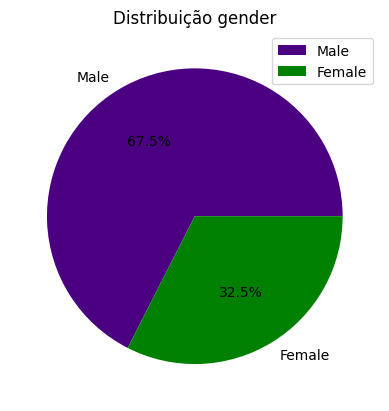

WORKCLASS
                  Frequência  Proporção (%)
Private                33307        73.6522
Self-emp-not-inc        3796         8.3941
Local-gov               3100         6.8551
State-gov               1946         4.3032
Self-emp-inc            1646         3.6398
Federal-gov             1406         3.1091
Without-pay               21         0.0464


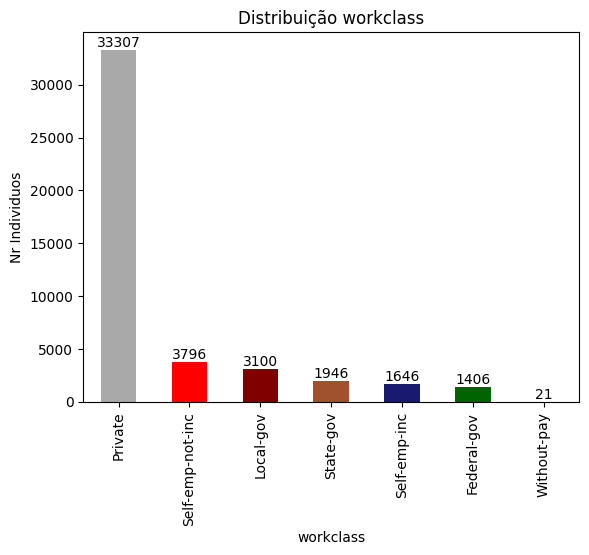

OCCUPATION
                   Frequência  Proporção (%)
Craft-repair             6020        13.3121
Prof-specialty           6008        13.2856
Exec-managerial          5984        13.2325
Adm-clerical             5540        12.2507
Sales                    5408        11.9588
Other-service            4808        10.6320
Machine-op-inspct        2970         6.5676
Transport-moving         2316         5.1214
Handlers-cleaners        2046         4.5243
Farming-fishing          1480         3.2727
Tech-support             1420         3.1401
Protective-serv           976         2.1582
Priv-house-serv           232         0.5130
Armed-Forces               14         0.0310


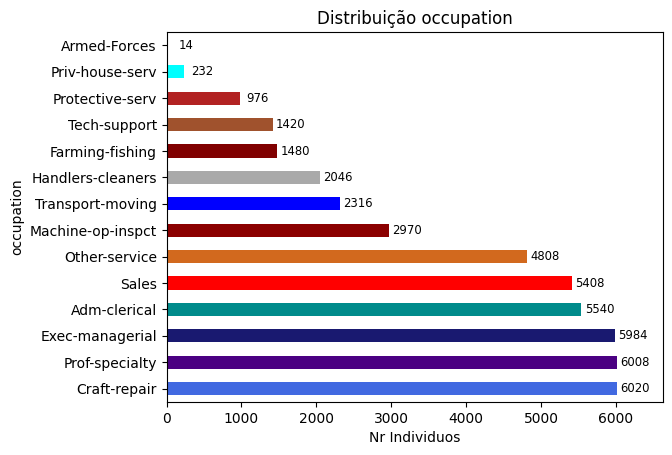

MARITAL-STATUS
                       Frequência  Proporção (%)
Married-civ-spouse          21055        46.5592
Never-married               14598        32.2807
Divorced                     6297        13.9246
Separated                    1411         3.1202
Widowed                      1277         2.8238
Married-spouse-absent         552         1.2206
Married-AF-spouse              32         0.0708


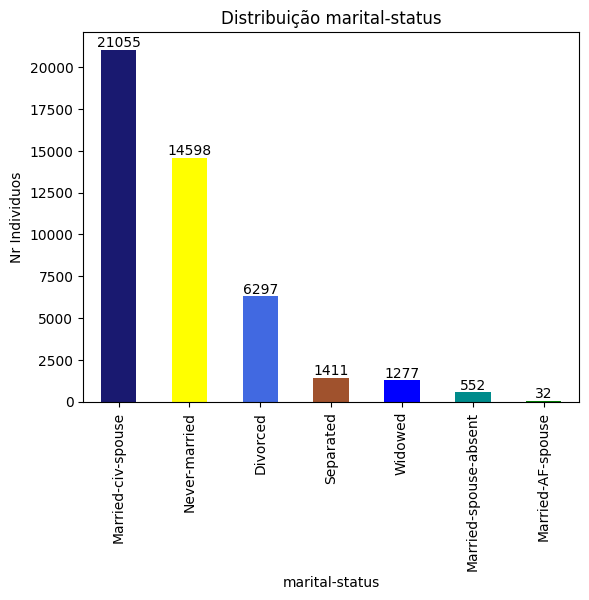

RELATIONSHIP
                Frequência  Proporção (%)
Husband              18666        41.2764
Not-in-family        11702        25.8768
Own-child             6626        14.6522
Unmarried             4788        10.5878
Wife                  2091         4.6239
Other-relative        1349         2.9831


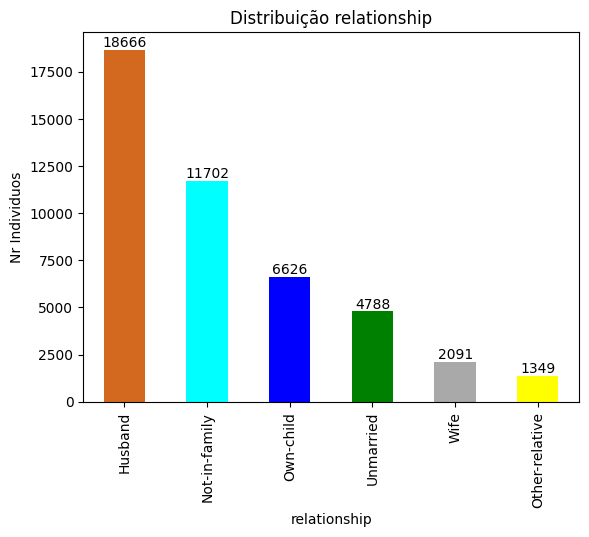

RACE
                    Frequência  Proporção (%)
White                    38903        86.0267
Black                     4228         9.3494
Asian-Pac-Islander        1303         2.8813
Amer-Indian-Eskimo         435         0.9619
Other                      353         0.7806


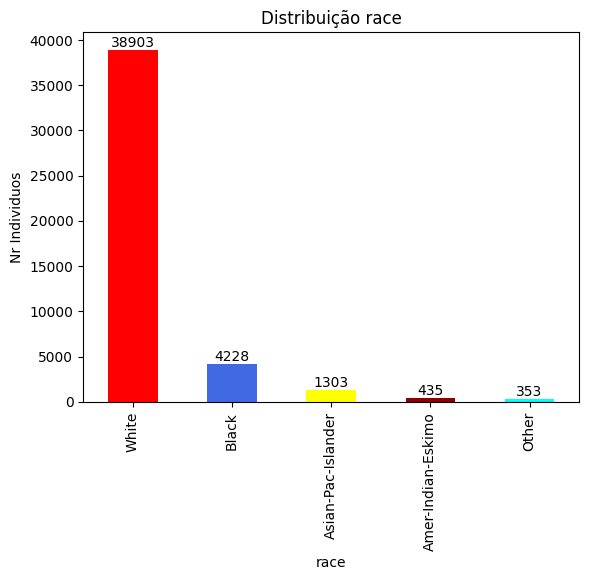

EDUCATION
              Frequência  Proporção (%)
HS-grad            14783        32.6898
Some-college        9899        21.8898
Bachelors           7570        16.7396
Masters             2514         5.5592
Assoc-voc           1959         4.3320
11th                1619         3.5801
Assoc-acdm          1507         3.3324
10th                1223         2.7044
7th-8th              823         1.8199
Prof-school          785         1.7359
9th                  676         1.4948
12th                 577         1.2759
Doctorate            544         1.2030
5th-6th              449         0.9929
1st-4th              222         0.4909
Preschool             72         0.1592


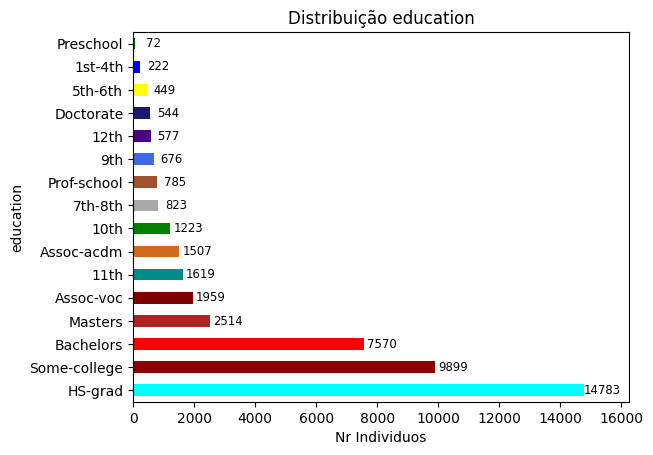

INCOME
       Frequência  Proporção (%)
<=50K       34014        75.2156
>50K        11208        24.7844


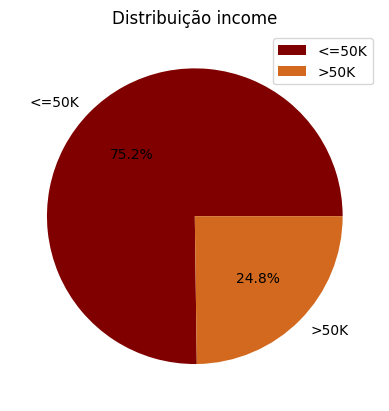

USA_NATIONAL
       Frequência  Proporção (%)
True        41292        91.3095
False        3930         8.6905


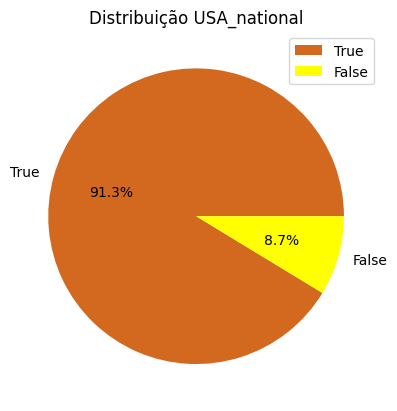

In [18]:
### Geração da tabela de frequencia, prop_table e gráfico para as variáveis Qualitativas



for atributo_nominal in lista_atributos_qualitativos:
    print(atributo_nominal.upper())
    print(freq_prop_tables(DF[atributo_nominal]))
    grafico_atributo_nominal(DF[atributo_nominal])
    
    

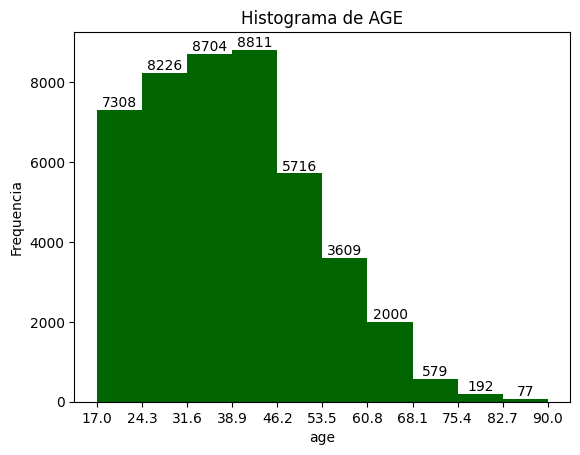

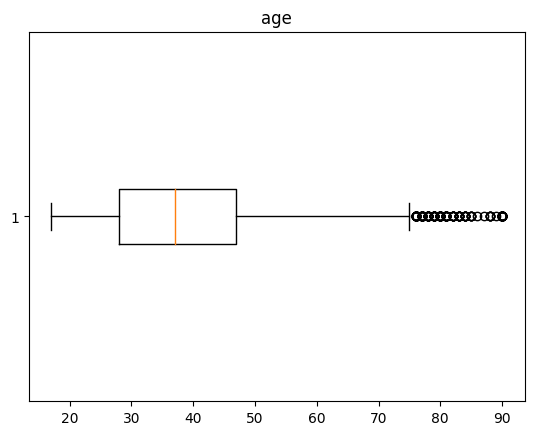

Medidas Estatísticas para  AGE
Media de  age  =  38.55
Mediana de  age  =  37.0
Variancia de  age  =  174.71
Desvio Padrao de   age  =  13.22
1º Quantile de  age  =  28.0
2º Quantile de  age  =  37.0
3º Quantile de  age  =  47.0
IQR de   age  =  19.0
Assimetria de  age  =  0.5328
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



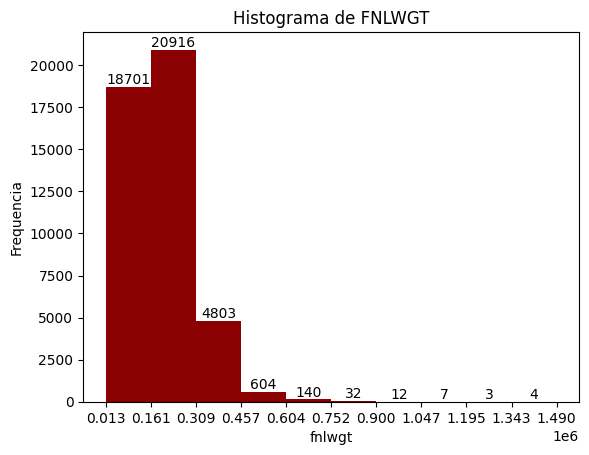

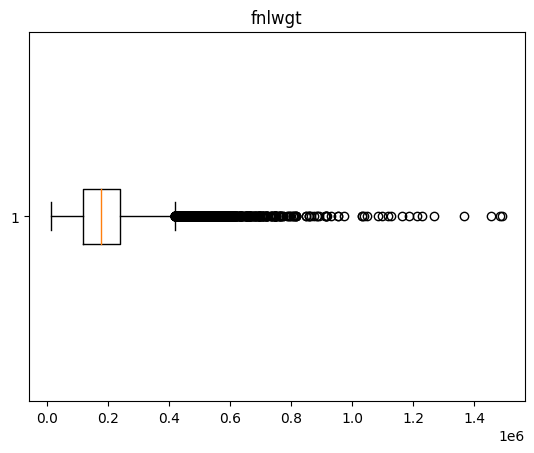

Medidas Estatísticas para  FNLWGT
Media de  fnlwgt  =  189734.73
Mediana de  fnlwgt  =  178316.0
Variancia de  fnlwgt  =  11159639548.61
Desvio Padrao de   fnlwgt  =  105639.2
1º Quantile de  fnlwgt  =  117388.25
2º Quantile de  fnlwgt  =  178316.0
3º Quantile de  fnlwgt  =  237926.0
IQR de   fnlwgt  =  120537.75
Assimetria de  fnlwgt  =  1.4475
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



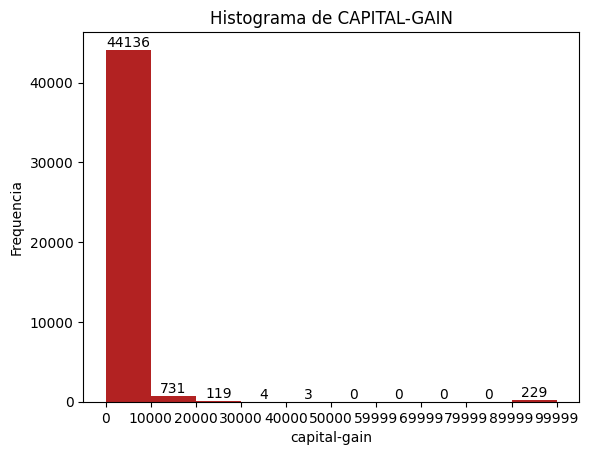

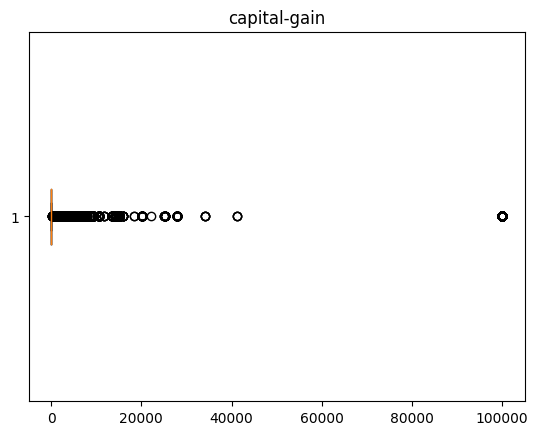

Medidas Estatísticas para  CAPITAL-GAIN
Media de  capital-gain  =  1101.43
Mediana de  capital-gain  =  0.0
Variancia de  capital-gain  =  56346492.6
Desvio Padrao de   capital-gain  =  7506.43
1º Quantile de  capital-gain  =  0.0
2º Quantile de  capital-gain  =  0.0
3º Quantile de  capital-gain  =  0.0
IQR de   capital-gain  =  0.0
Assimetria de  capital-gain  =  11.789
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



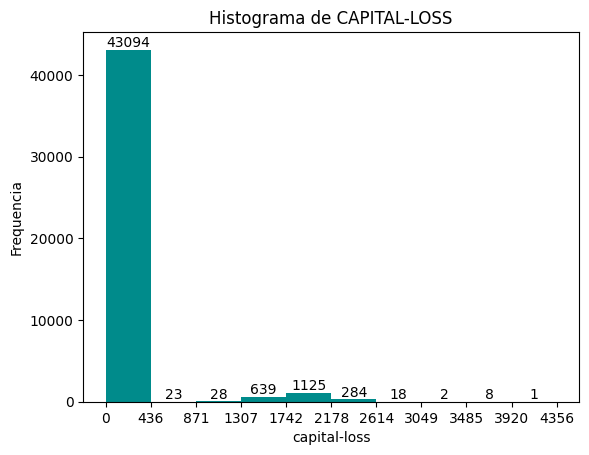

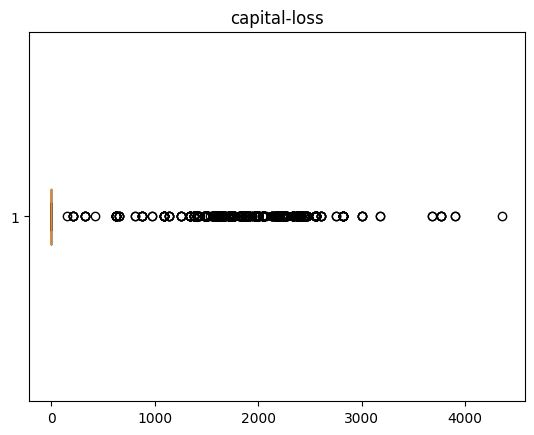

Medidas Estatísticas para  CAPITAL-LOSS
Media de  capital-loss  =  88.6
Mediana de  capital-loss  =  0.0
Variancia de  capital-loss  =  163989.44
Desvio Padrao de   capital-loss  =  404.96
1º Quantile de  capital-loss  =  0.0
2º Quantile de  capital-loss  =  0.0
3º Quantile de  capital-loss  =  0.0
IQR de   capital-loss  =  0.0
Assimetria de  capital-loss  =  4.5163
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



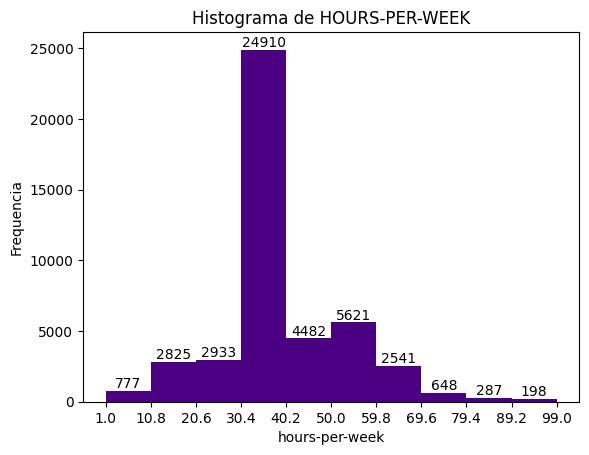

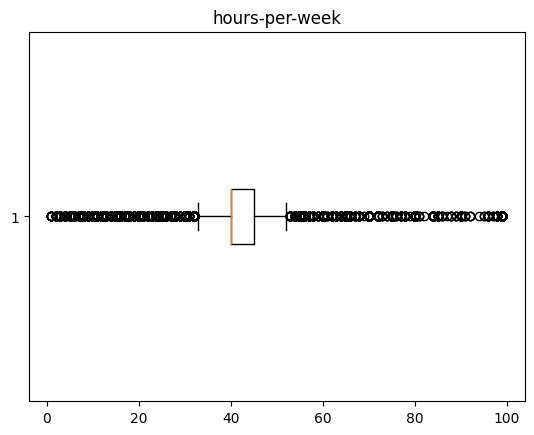

Medidas Estatísticas para  HOURS-PER-WEEK
Media de  hours-per-week  =  40.94
Mediana de  hours-per-week  =  40.0
Variancia de  hours-per-week  =  144.18
Desvio Padrao de   hours-per-week  =  12.01
1º Quantile de  hours-per-week  =  40.0
2º Quantile de  hours-per-week  =  40.0
3º Quantile de  hours-per-week  =  45.0
IQR de   hours-per-week  =  5.0
Assimetria de  hours-per-week  =  0.3405
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



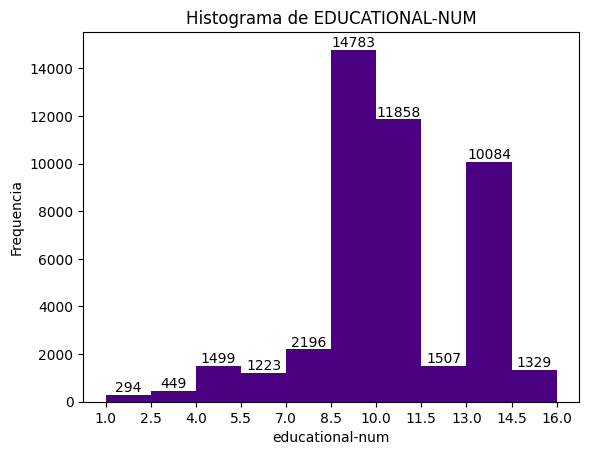

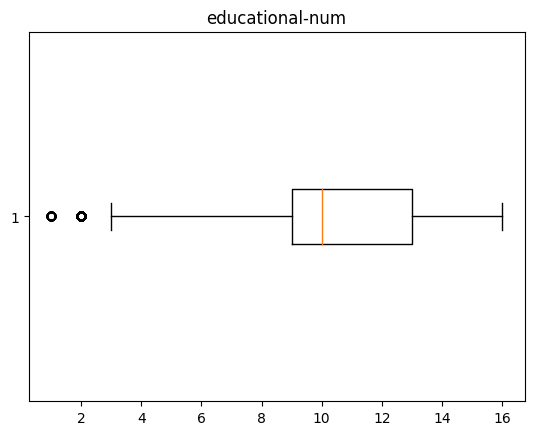

Medidas Estatísticas para  EDUCATIONAL-NUM
Media de  educational-num  =  10.12
Mediana de  educational-num  =  10.0
Variancia de  educational-num  =  6.52
Desvio Padrao de   educational-num  =  2.55
1º Quantile de  educational-num  =  9.0
2º Quantile de  educational-num  =  10.0
3º Quantile de  educational-num  =  13.0
IQR de   educational-num  =  4.0
Assimetria de  educational-num  =  -0.3106
pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal

 



In [19]:
              
### Analise das variaveis quantitativas



for atributo_quantitativo in lista_atributos_quantitativos:
    
    # Histogramas 
    
    fig, ax = plt.subplots(1, 1)
    frequencias =ax.hist(DF[atributo_quantitativo], color=random.choice(cores_grafico))
    ax.set_xticks(frequencias[1]) #-> faz a marcação dos limites dos intervalos no grafico, no eixo x
    
    # Set title
    titulo="Histograma de " + atributo_quantitativo.upper()
    ax.set_title(titulo)
    # adding labels
    ax.set_xlabel(atributo_quantitativo)
    ax.set_ylabel('Frequencia')
    
    # Armazena as informações de cada um das barras do histograma em barras
    barras = ax.patches

    # para cada um das barras, escreve no topo o tamanho da barra  
    for barra in barras:
        height = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, height+0.01, int(height),
                ha='center', va='bottom')
    
    # Show plot
    plt.show()
    
    
    
    ### Histogramas 
    plt.title(atributo_quantitativo)
    plt.boxplot(DF[atributo_quantitativo], vert=0)
   # plt.legend(DF[atributo].describe())
    plt.show()
     # Medidas Estatisticas
    print ("Medidas Estatísticas para ",  atributo_quantitativo.upper())
    media=round(DF[atributo_quantitativo].mean(),2)
    print ("Media de ", atributo_quantitativo, " = ", media )
    mediana=round(DF[atributo_quantitativo].median(),2)
    print ("Mediana de ", atributo_quantitativo, " = ", mediana)
    print ("Variancia de ", atributo_quantitativo, " = ", round(DF[atributo_quantitativo].var(),2))
    print ("Desvio Padrao de  ", atributo_quantitativo, " = ", round(DF[atributo_quantitativo].std(),2))
    Q1=round(DF[atributo_quantitativo].quantile(0.25),3)
    print ("1º Quantile de ", atributo_quantitativo, " = ", Q1)
    Q2=round(DF[atributo_quantitativo].quantile(0.50),3)
    print ("2º Quantile de ", atributo_quantitativo, " = ", Q2 )
    Q3=round(DF[atributo_quantitativo].quantile(0.75),3)
    print ("3º Quantile de ", atributo_quantitativo, " = ", Q3 )
    print ("IQR de  ", atributo_quantitativo, " = ", Q3-Q1)
    print ("Assimetria de ", atributo_quantitativo, " = " , round(DF[atributo_quantitativo].skew(),4))
   # print ("Moda de ", atributo, " = ", DF[atributo].mode())
   
   
   # TEste de normalidade

    
   #H0: Tem distribuição
   #H1:Não tem distribuição normal
    alpha=0.05
   
    estat_test= normaltest(DF[atributo_quantitativo]) 
    pvalue=estat_test[1]
    
    if ( pvalue< alpha) :
        print("pvalue < alpha. Rejeitar HO. Há evidencias que a variavel nao tem distribuição normal")
    else:
        print("pvalue >= alpha. Não Rejeitar HO. Nao  Há evidencias que a variavel nao tem distribuição normal. Por isso, "
              "consideramos qur a variavel tem distribuicao normal")
   
   
    print("\n", "\n")
   
    

O atributo capital-gain posssui uma distribuição muito disforme. 90% das amostras estão entre 0 e 1000

In [20]:
# ### ATRIBUTO CAPITAL_lOSS
# DF['capital-loss'].value_counts().values.min()
# bins=[1,1000,5000,10000,45000]
# DF_cl_factor=pd.cut(DF['capital-loss'], bins=bins, include_lowest=True)
# # print(freq_prop_tables(DF_cl_factor,factor))
# #grafico_atributo_nominal(DF_cl_factor)
# DF_cl_factor.nunique()

In [21]:
### Verificação de qts Capital-Loss são iguais a zero
print(sum(DF['capital-loss']==0))
perc_CG_zero=sum(DF['capital-loss']==0)/DF.shape[0]
print (perc_CG_zero)


43082
0.9526779001371014


43082 das amostras de capital-loss são iguais a zero, o que representa 95.27 % do dataset. Verificar a viabilidade de retirar o atributo

In [22]:
### Verificação de qts Capital-gain são iguai a zero

print(sum(DF['capital-gain']==0))
perc_CG_zero=sum(DF['capital-gain']==0)/DF.shape[0]
print (perc_CG_zero*100,'% de capital-gain = 0')

#Verificação do percentuall de capital-gain==0 tb sao capital-loss==0

print(sum(DF['capital-gain']==0 & (DF['capital-gain']==0))/sum(DF['capital-gain']==0)*100, "% de capital-gain que têm capital gain = zero tb têm capital-loss igual à zero")



41432
91.619123435496 % de capital-gain = 0
100.0 % de capital-gain que têm capital gain = zero tb têm capital-loss igual à zero


41432 das amostras de capital-gain são iguais a zero, o que representa 91.62 % do datset. Esse atributo não parece significativo para o modelo

In [23]:
print(sum(DF['capital-loss']==0 & (DF['capital-gain']==0)))

43082


 --- EDUCATION ---
              Frequencia  Proporcao (%)
Preschool             72         0.1592
1st-4th              222         0.4909
5th-6th              449         0.9929
7th-8th              823         1.8199
9th                  676         1.4948
10th                1223         2.7044
11th                1619         3.5801
Some-college        9899        21.8898
HS-grad            14783        32.6898
Bachelors           7570        16.7396
Masters             2514         5.5592
Assoc-voc           1959         4.3320
Assoc-acdm          1507         3.3324
Prof-school          785         1.7359
Doctorate            544         1.2030


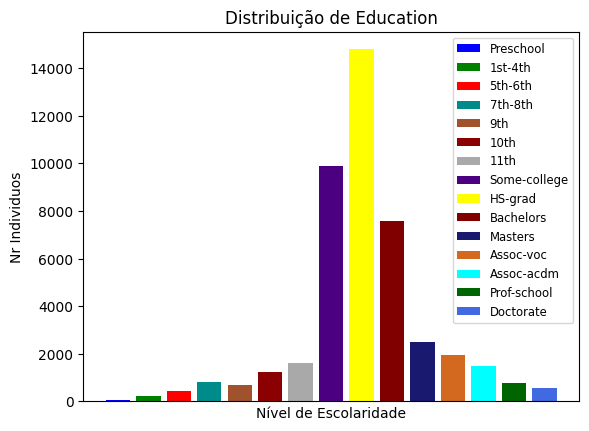

 __________________________


In [24]:
## Atributo Education - Ordenação
#Classe Education

### Criando as categorias e ordenando a classe categorica
cat_order_education = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th',
                          'Some-college','HS-grad','Bachelors','Masters','Assoc-voc','Assoc-acdm','Prof-school','Doctorate']

education_categoric=pd.Categorical(DF['education'],categories=cat_order_education,ordered=True)

# Após ordenar o atributo, criar e imprimir a prop_tabl
freq_table_education=education_categoric.value_counts()

prop_table_education=round((freq_table_education/len(education_categoric))*100,4)
DF_education=pd.DataFrame(freq_table_education, columns=['Frequencia'])
DF_education["Proporcao (%)"]=prop_table_education


#####

print (" --- EDUCATION ---")
print(DF_education)


### Grafico de Barras da variavel categorica
#plt.bar(education_categoric.categories, education_categoric.value_counts())


######
# Cria um gráfico de barras para o atributo, com uma barra de cada cor
fig, ax = plt.subplots()
for i, cat in enumerate(education_categoric.categories): # cada um das barras de uma cor
    ax.bar(cat, education_categoric.value_counts()[i], color=cores_grafico[i])
        # Barra tem ordem: categoria, valor_da_categoria, cor


# Título do gráfico e os rótulos dos eixos
plt.title('Distribuição de Education')
plt.xlabel('Nível de Escolaridade')
plt.xticks([]) # retirar os dados do eixo x
plt.ylabel('Nr Individuos')
plt.legend(education_categoric.categories, loc='upper right', fontsize='small')
plt.show()

print( " __________________________")


In [34]:
## Mapeamento das variaveis qualitativas

## Mapeamento de education

codigos_edu={'Preschool':1, '1st-4th':2, '5th-6th':3, '7th-8th':4, '9th':5, '10th':6, '11th':7,
       'Some-college':8, 'HS-grad':9, 'Bachelors':10, 'Masters':11, 'Assoc-voc':12,
       'Assoc-acdm':13, 'Prof-school':14, 'Doctorate':15}
DF['education-cod']=DF['education'].map(codigos_edu)

#Mapeando Gender
codigo_ge={'Male':1, 'Female':2}
DF['gender-cod']=DF['gender'].map(codigo_ge)

#Mapeando Workclass
codigos_workc={'Private':1, 'Self-emp-not-inc':2, 'Local-gov':3, 'State-gov':4,
       'Self-emp-inc':5, 'Federal-gov':6, 'Without-pay':7}
DF['workclass-cod']=DF['workclass'].map(codigos_workc)


# Mapeando Race

codigos_race={'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4,
       'Other':5}
DF['race-cod']=DF['race'].map(codigos_race)

# Mapeando Relationship
codigos_relationship={'Husband':1, 'Not-in-family':2, 'Own-child':3, 'Unmarried':4, 'Wife':5,
       'Other-relative':6}
DF['relationship-cod']=DF['relationship'].map(codigos_relationship)


## Mapeando marital-status

codigos_married={'Married-civ-spouse':1, 'Never-married':2, 'Divorced':3, 'Separated':4,
       'Widowed':5, 'Married-spouse-absent':6, 'Married-AF-spouse':7}
DF['marital-status-cod']=DF['marital-status'].map(codigos_married)

### Mapeando occupation

codigos_occupa={'Craft-repair':1, 'Prof-specialty':2, 'Exec-managerial':3,
       'Adm-clerical':4, 'Sales':5, 'Other-service':6, 'Machine-op-inspct':7,
       'Transport-moving':8, 'Handlers-cleaners':9, 'Farming-fishing':10,
       'Tech-support':11, 'Protective-serv':12, 'Priv-house-serv':13,
       'Armed-Forces':14}
DF['occupation-cod']=DF['occupation'].map(codigos_occupa)

#Mapeando Income
codigo_inc={'<=50K':1, '>50K':2}
DF['income-cod']=DF['income'].map(codigo_inc)


In [35]:
# Correlação
# Os atributos nao possuem distribuição normal. Por isso, usaremos o method e spearman para o calculo do coeficiente de correlação

corr_matrix = DF.corr(method='spearman',numeric_only=True)
corr_matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,USA_national,education-cod,gender-cod,workclass-cod,race-cod,relationship-cod,marital-status-cod,occupation-cod,income-cod
age,1.000000,-0.077455,0.067171,0.121161,0.060635,0.157484,0.010903,0.105054,-0.093138,0.207818,-0.024776,-0.305649,-0.145270,-0.099786,0.272185
fnlwgt,-0.077455,1.000000,-0.032139,-0.009988,-0.002111,-0.020791,-0.080432,-0.034566,-0.027561,-0.047497,0.041533,0.018665,0.015900,0.008940,-0.006415
educational-num,0.067171,-0.032139,1.000000,0.119901,0.077575,0.165424,0.079739,0.709275,0.002384,0.173991,-0.046684,-0.100640,-0.086169,-0.271662,0.328533
capital-gain,0.121161,-0.009988,0.119901,1.000000,-0.067296,0.093086,0.018792,0.108115,-0.066691,0.050623,-0.026404,-0.102250,-0.104834,-0.070218,0.277104
capital-loss,0.060635,-0.002111,0.077575,-0.067296,1.000000,0.060391,0.012772,0.064780,-0.042922,0.032239,-0.021164,-0.065250,-0.063659,-0.042214,0.139200
hours-per-week,0.157484,-0.020791,0.165424,0.093086,0.060391,1.000000,0.024451,0.177321,-0.265318,0.081636,-0.078524,-0.306441,-0.210045,-0.103550,0.265798
USA_national,0.010903,-0.080432,0.079739,0.018792,0.012772,0.024451,1.000000,0.075916,0.008559,0.047887,-0.205018,-0.033784,0.002876,-0.034281,0.038913
education-cod,0.105054,-0.034566,0.709275,0.108115,0.064780,0.177321,0.075916,1.000000,-0.024787,0.137930,-0.040599,-0.107657,-0.089462,-0.231026,0.276394
gender-cod,-0.093138,-0.027561,0.002384,-0.066691,-0.042922,-0.265318,0.008559,-0.024787,1.000000,-0.057877,0.099295,0.605976,0.458659,0.041194,-0.215760
workclass-cod,0.207818,-0.047497,0.173991,0.050623,0.032239,0.081636,0.047887,0.137930,-0.057877,1.000000,0.006141,-0.108944,-0.092954,-0.084710,0.127203


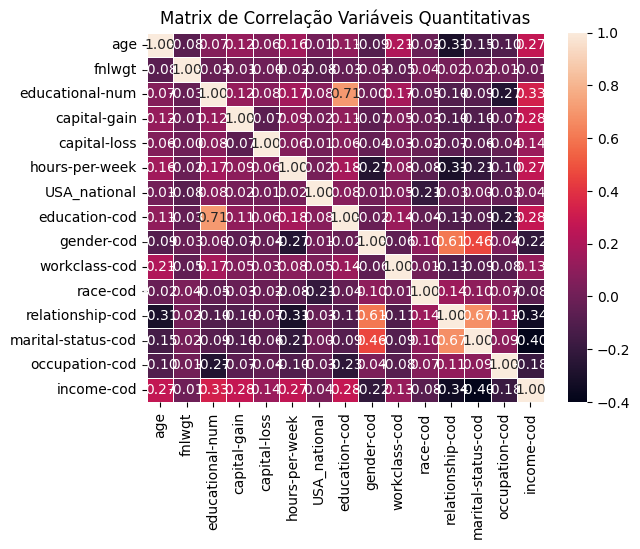

In [36]:
heatmap=sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=.6)
plt.title("Matrix de Correlação Variáveis Quantitativas")

plt.show()

## É possível identificar que há um correlação significativa entre educational-num e education; relationship e marrital-status e entre gender e relationship

In [28]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 45222 non-null  int64  
 1   workclass           45222 non-null  object 
 2   fnlwgt              45222 non-null  int64  
 3   education           45222 non-null  object 
 4   educational-num     45222 non-null  int64  
 5   marital-status      45222 non-null  object 
 6   occupation          45222 non-null  object 
 7   relationship        45222 non-null  object 
 8   race                45222 non-null  object 
 9   gender              45222 non-null  object 
 10  capital-gain        45222 non-null  int64  
 11  capital-loss        45222 non-null  int64  
 12  hours-per-week      45222 non-null  int64  
 13  native-country      45222 non-null  object 
 14  income              45222 non-null  object 
 15  USA_national        45222 non-null  bool   
 16  educ

In [29]:
##### Tabelas de contigencia ####

from scipy.stats import chi2_contingency
lista_tab_cont=[]
#tabela_contingencia=pd.DataFrame(columns=['atrib1','atrib2'])#, 'chi2','p_value','dof'
for i in range(len(lista_atributos_qualitativos)):
    for j in range(i+1,(len(lista_atributos_qualitativos))):
        if (i < len(lista_atributos_qualitativos)):
            contingency_table=pd.crosstab(DF[lista_atributos_qualitativos[i]], DF[lista_atributos_qualitativos[j]])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            nova_linha=(lista_atributos_qualitativos[i],lista_atributos_qualitativos[j],chi2, p_value, dof)
            lista_tab_cont.append(nova_linha)
           
lista_tab_cont
array_tab_cont = np.array(lista_tab_cont)
DF_tab_cont = pd.DataFrame(array_tab_cont, columns=['atrib1', 'atrib2', 'chi2', 'p_value', 'dof'])

DF_tab_cont

,atrib1,atrib2,chi2,p_value,dof
0,gender,workclass,937.0297890726563,3.705419100911257e-199,6
1,gender,occupation,8585.870774560773,0.0,13
2,gender,marital-status,9777.085064937652,0.0,6
3,gender,relationship,19030.20350829162,0.0,5
4,gender,race,619.6961951962987,8.457250584247844e-133,4
5,gender,education,358.8500017963396,2.956313547427433e-67,15
6,gender,income,2104.1337213723855,0.0,1
7,gender,USA_national,3.2479208885461905,0.07151411713508046,1
8,workclass,occupation,12769.427527680198,0.0,78
9,workclass,marital-status,1626.4195745565542,0.0,36


In [30]:
# Hipótese nula (H0): Não há associação entre as variáveis.
# Hipótese alternativa (Ha): Há associação entre as variáveis.


# p-value<alpha. rejeita a hipotese nula

# print(f"Qui-quadrado: {chi2:.2f}")
# print(f"Valor p: {p:.4f}")
# print(f"Graus de liberdade: {dof}")
# print("Frequências esperadas:")
# print(expected)

----------------- GENDER --------------------------------


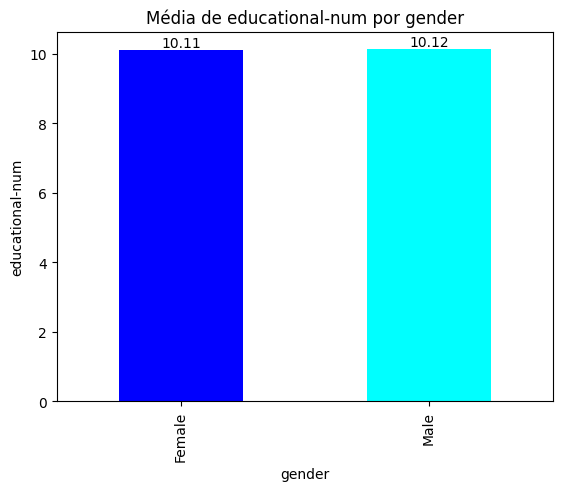

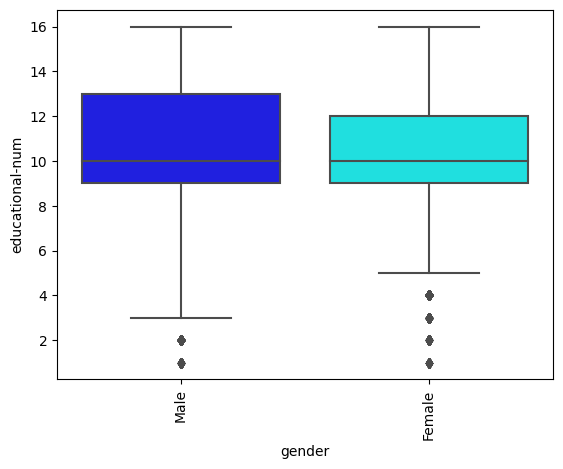

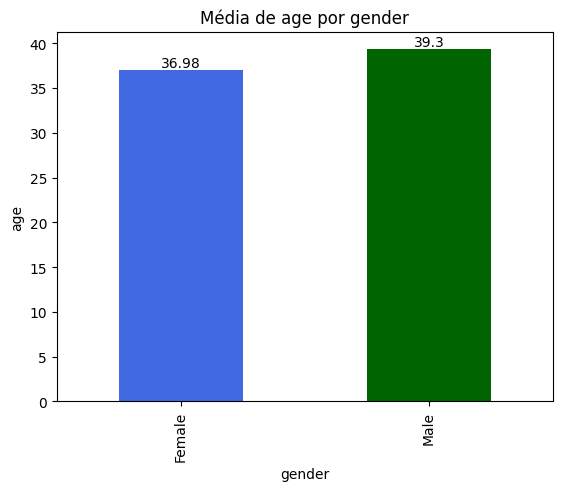

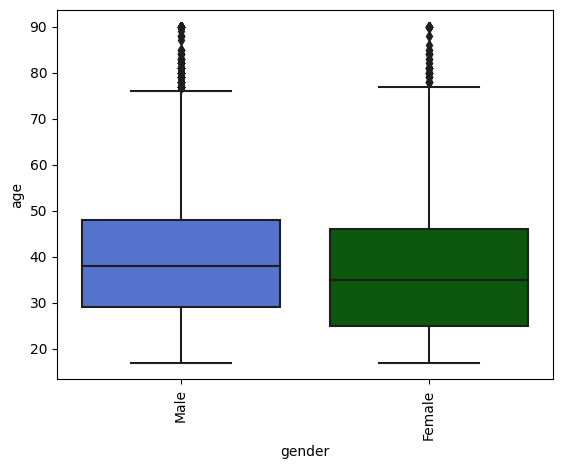

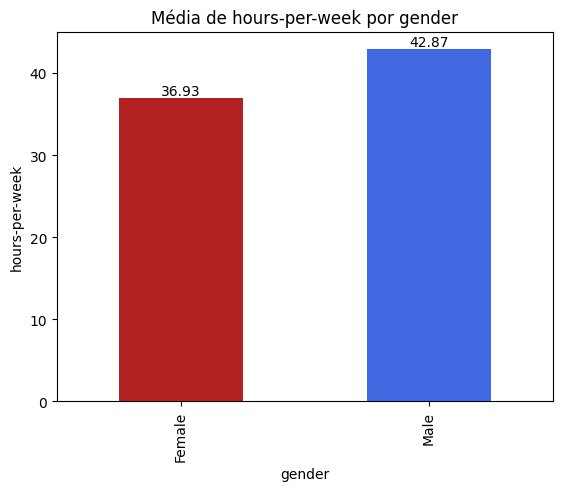

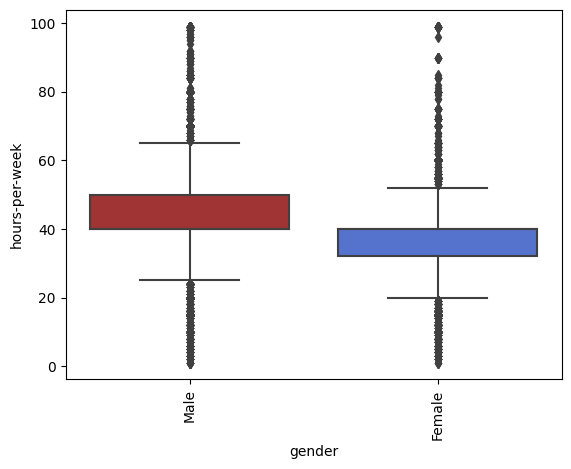

----------------- WORKCLASS --------------------------------


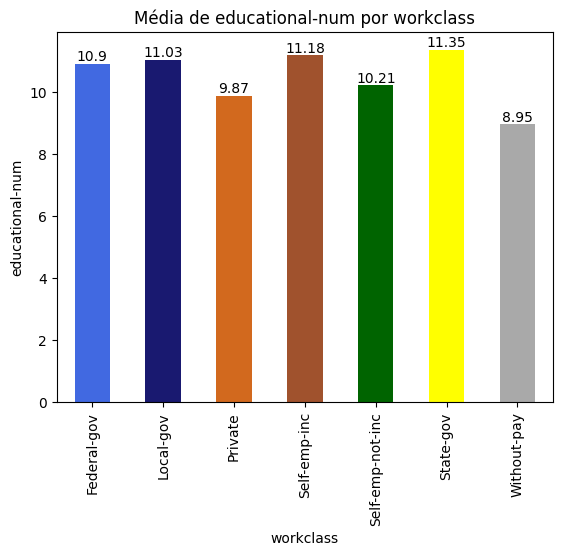

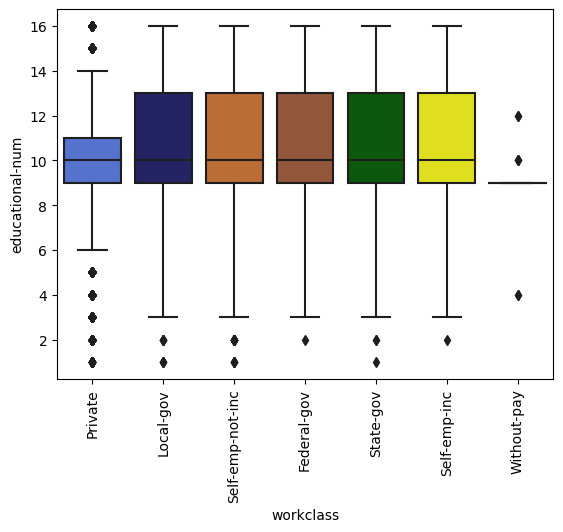

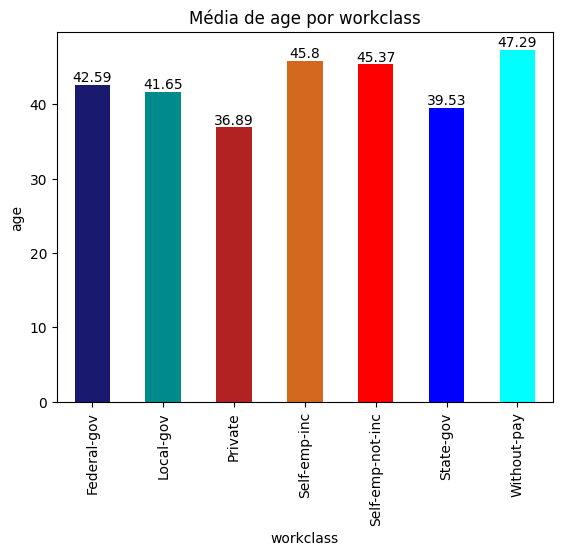

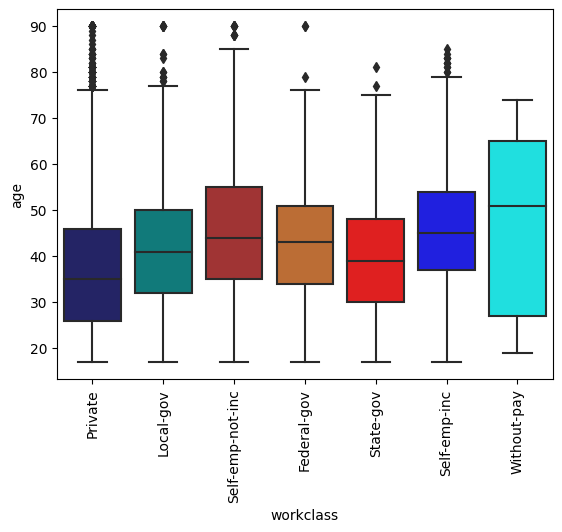

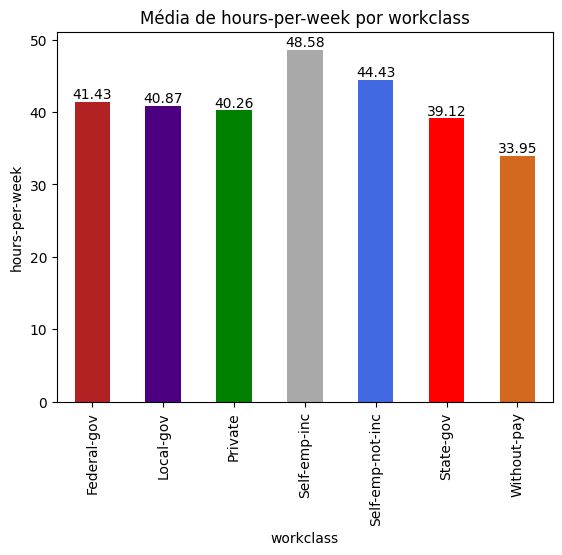

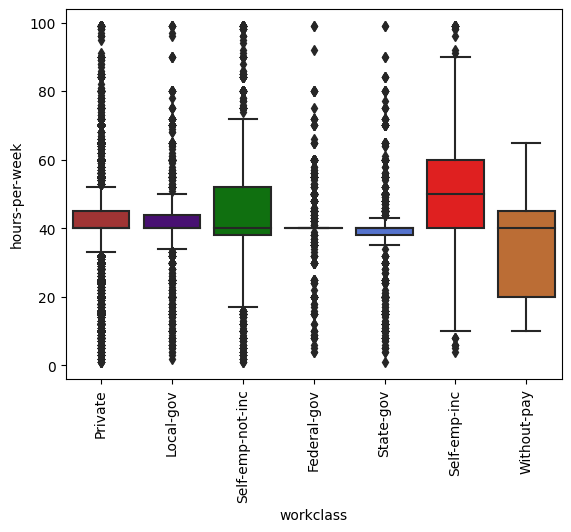

----------------- OCCUPATION --------------------------------


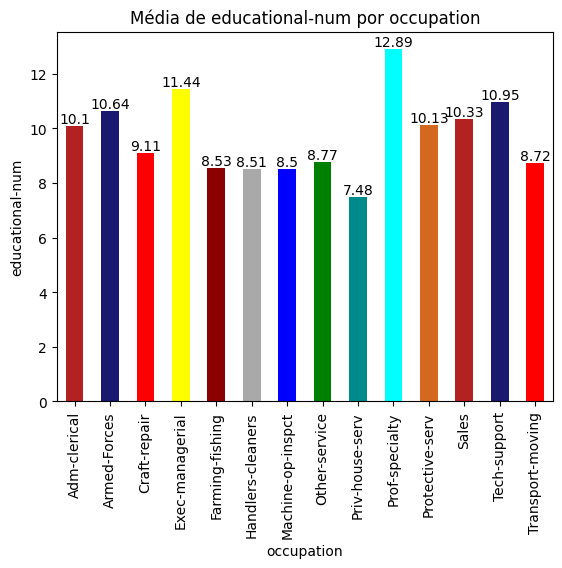

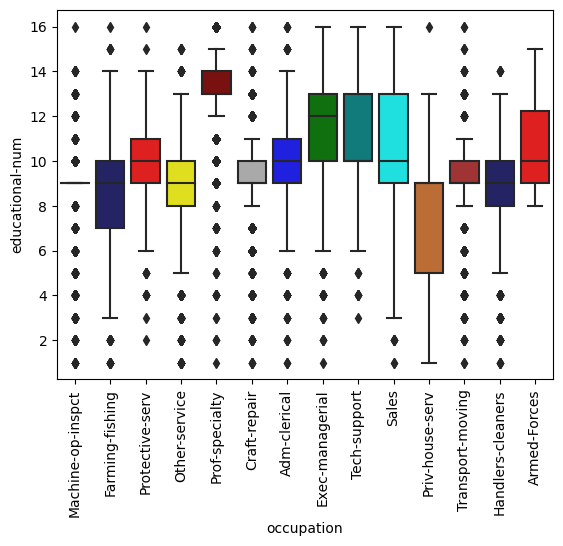

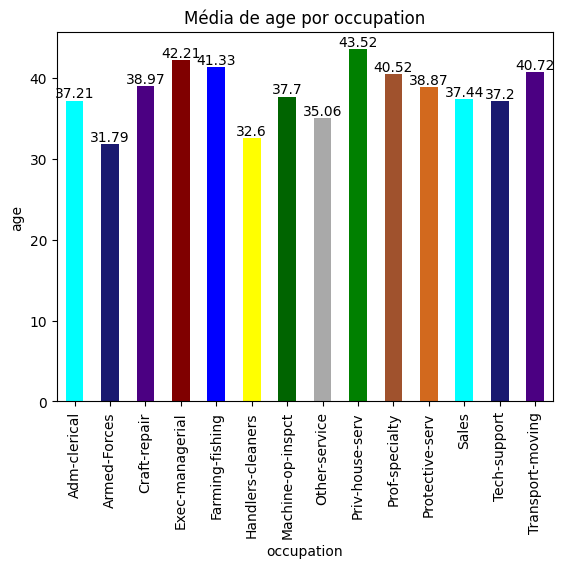

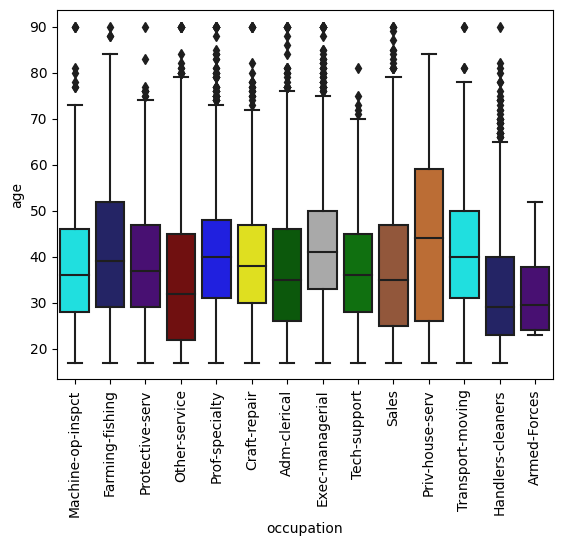

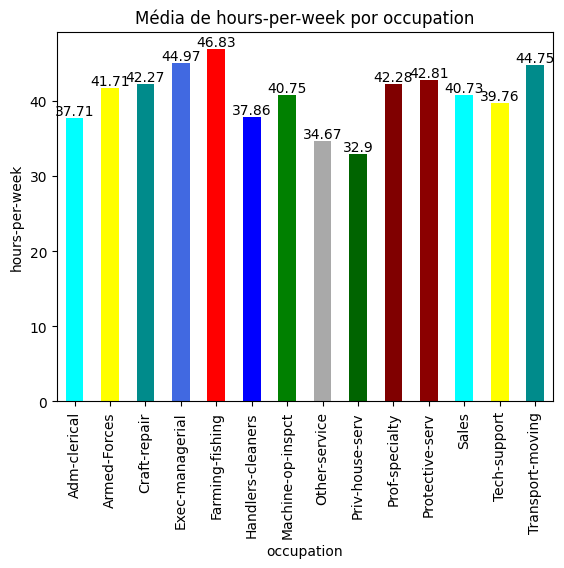

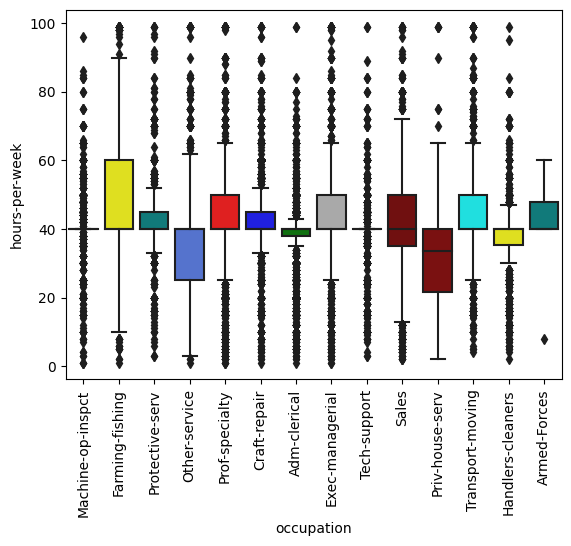

----------------- MARITAL-STATUS --------------------------------


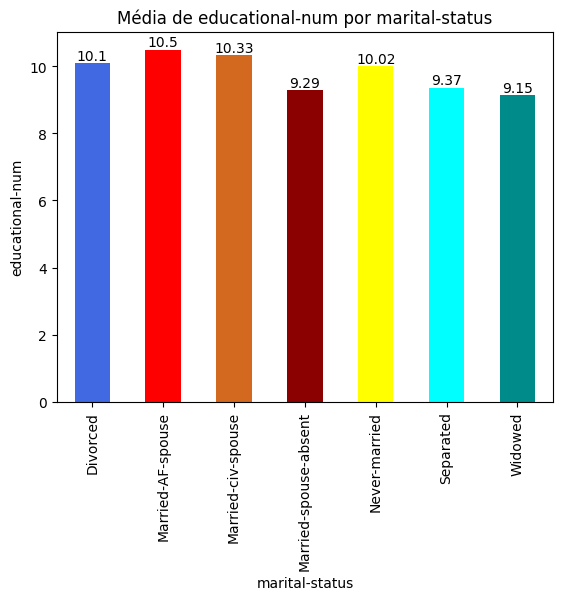

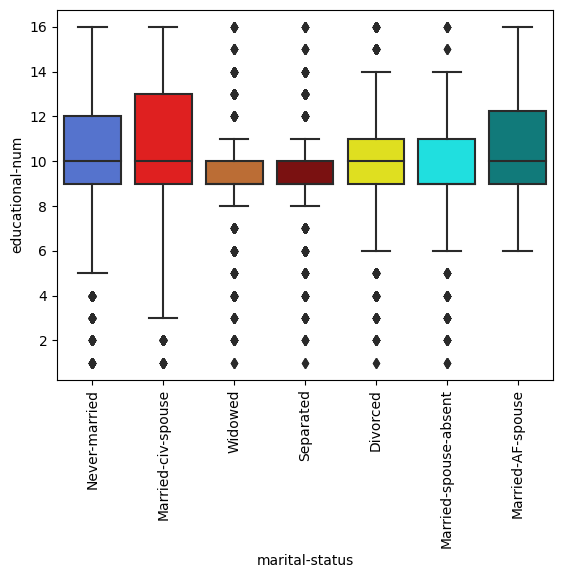

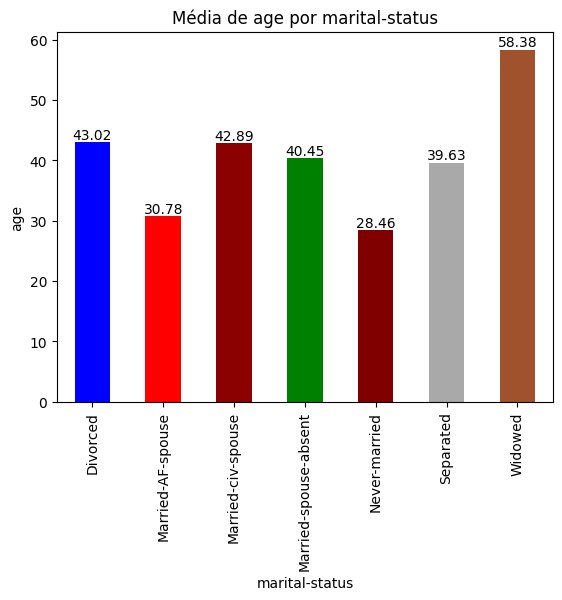

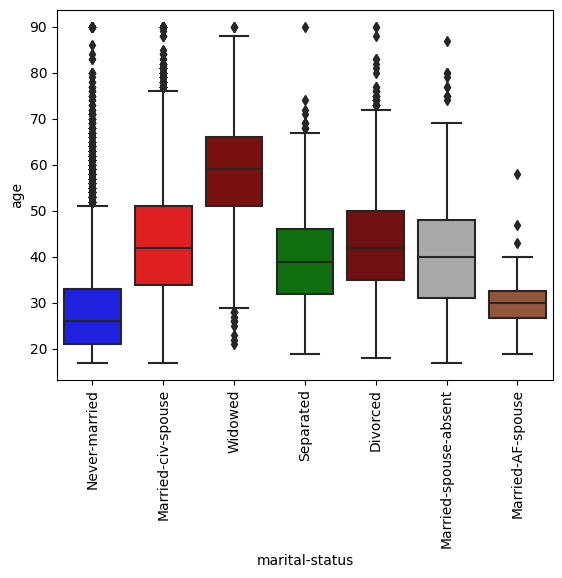

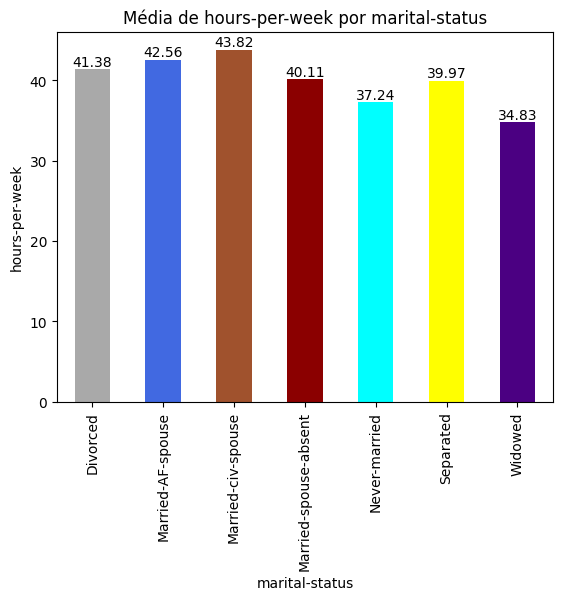

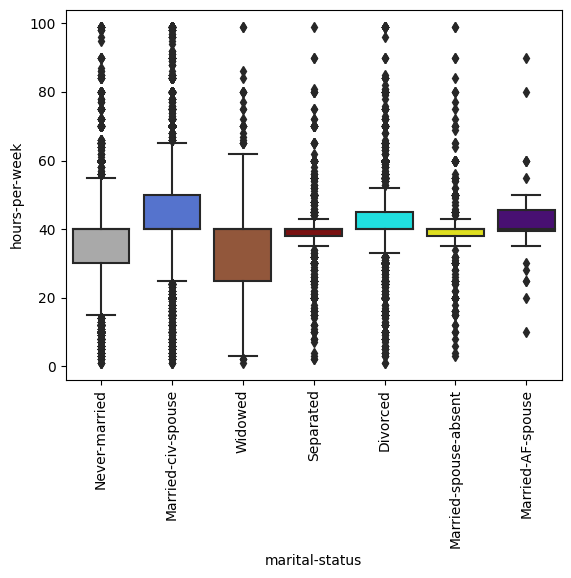

----------------- RELATIONSHIP --------------------------------


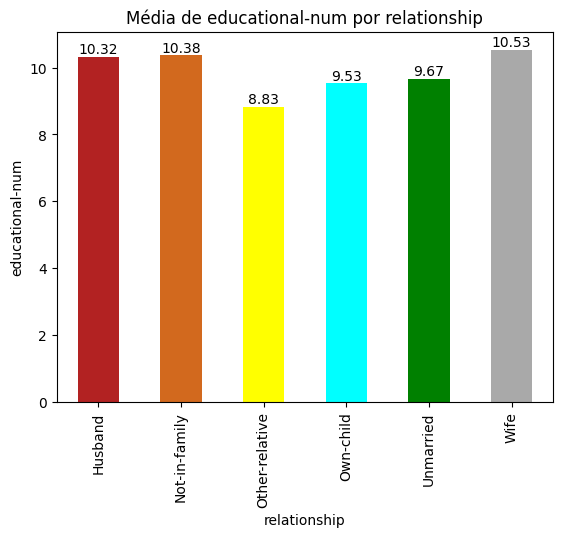

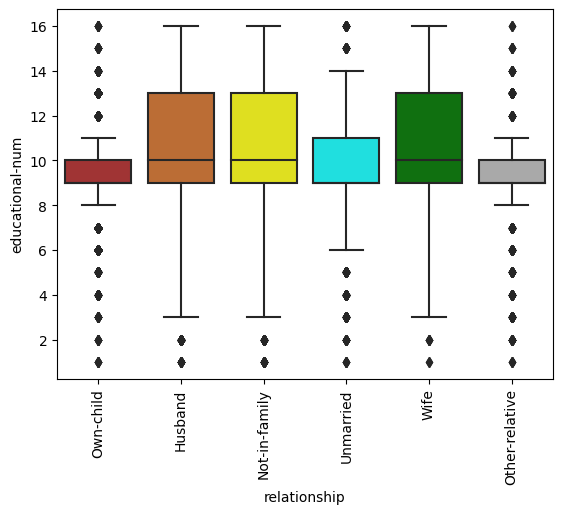

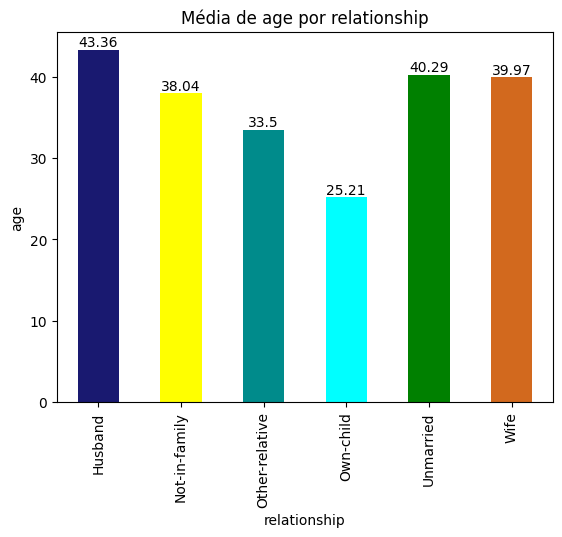

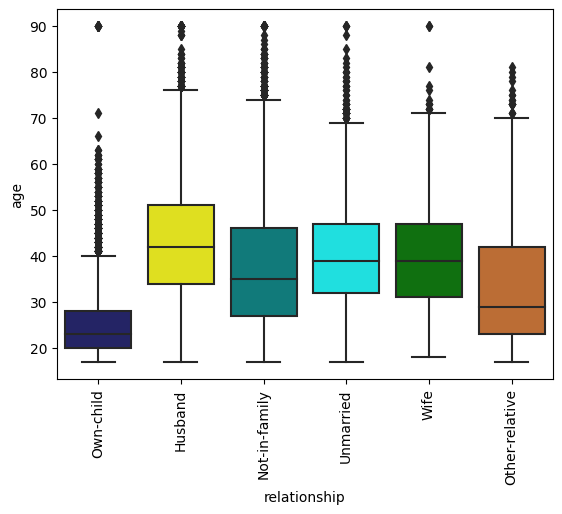

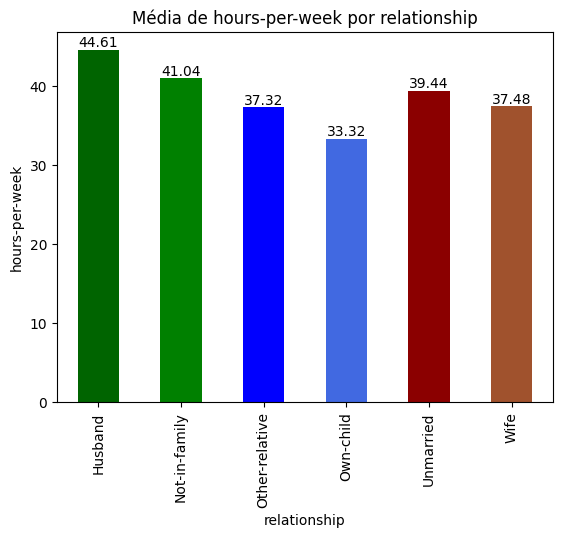

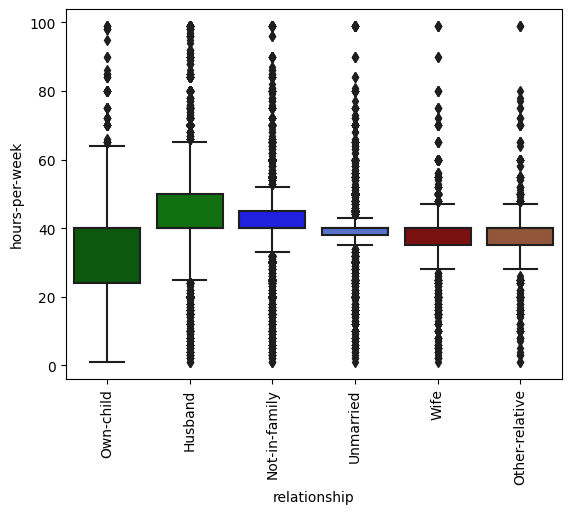

----------------- RACE --------------------------------


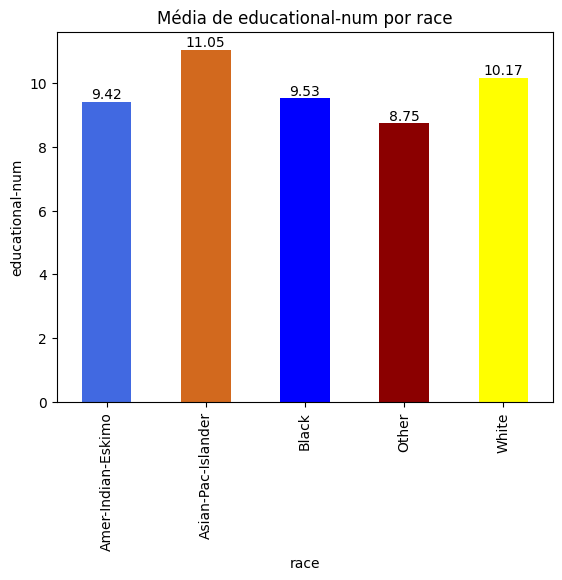

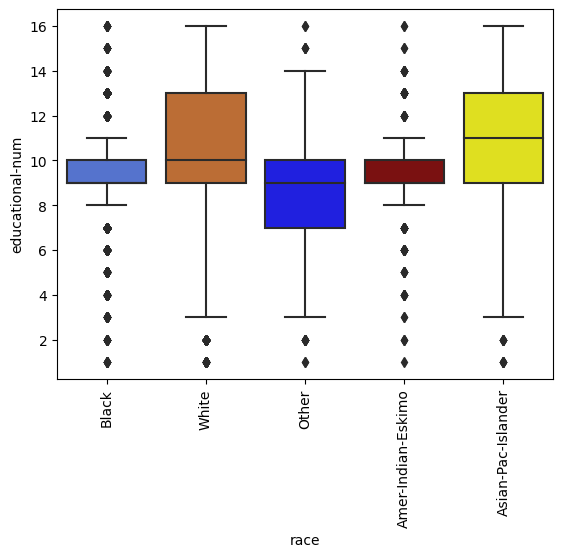

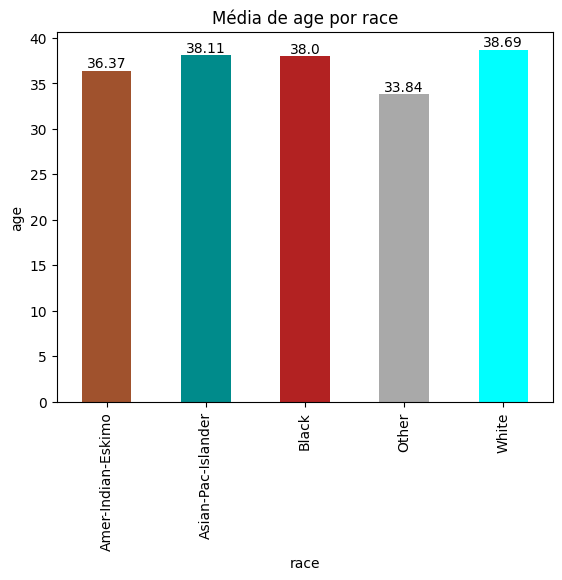

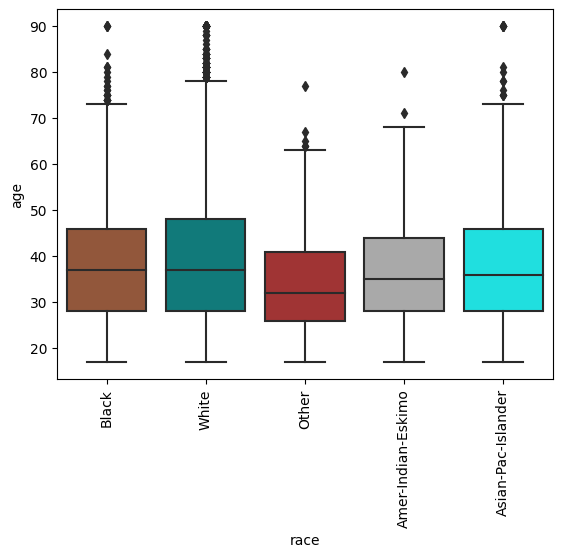

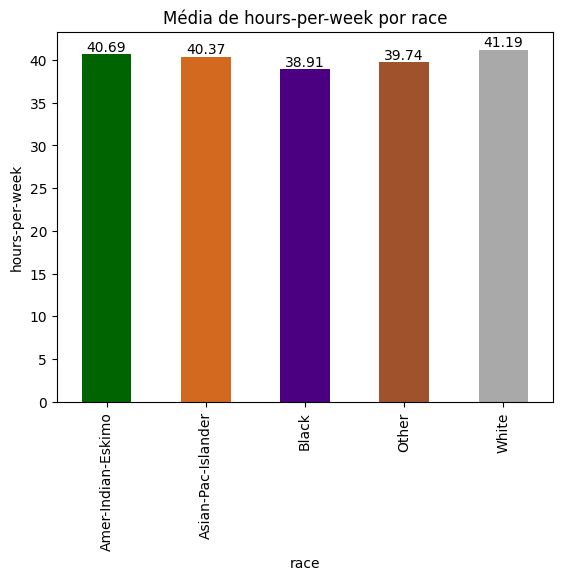

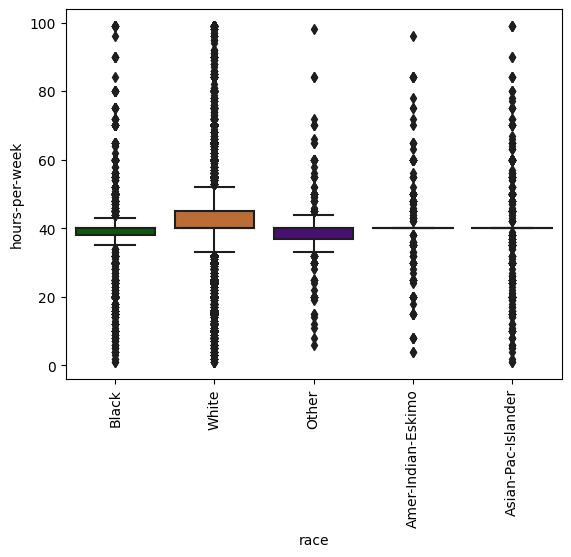

----------------- EDUCATION --------------------------------


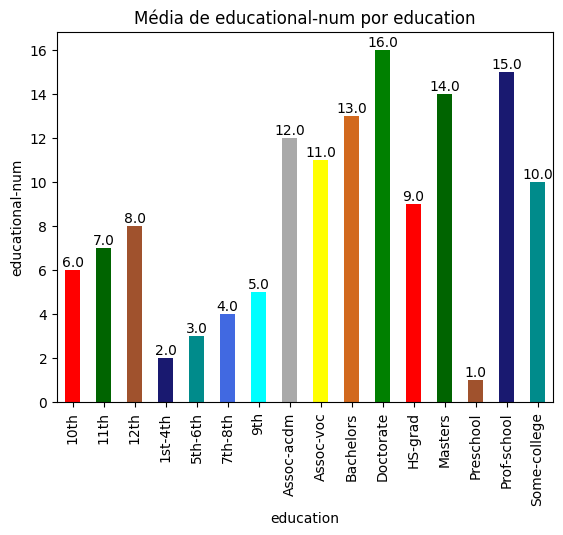

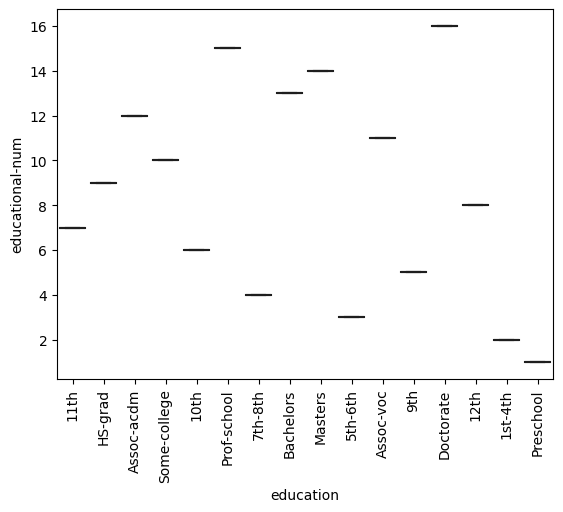

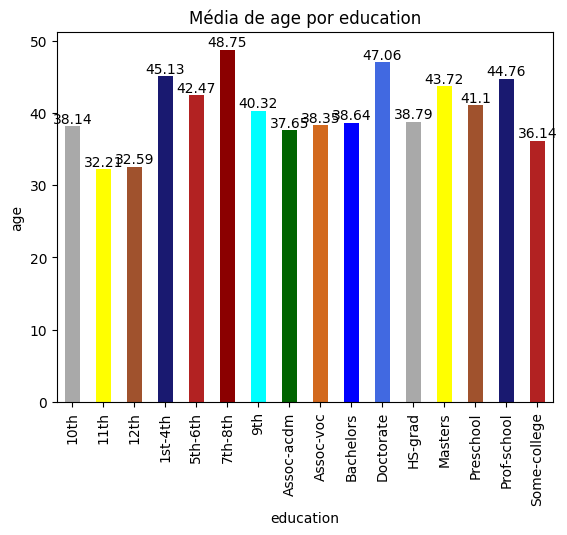

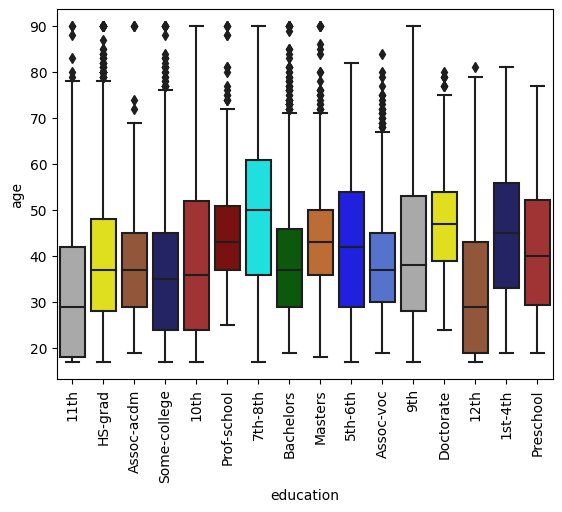

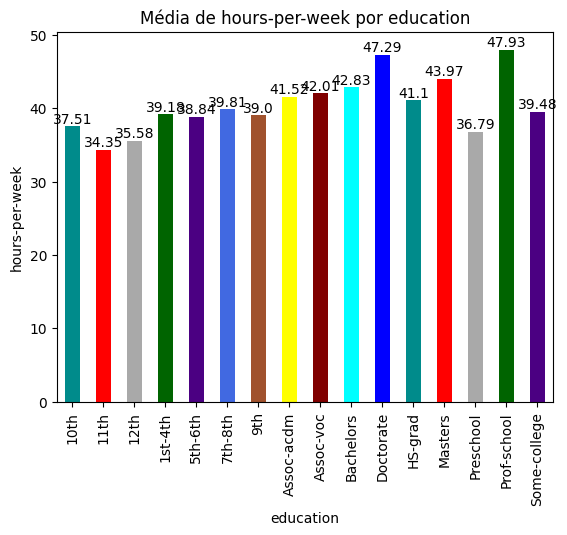

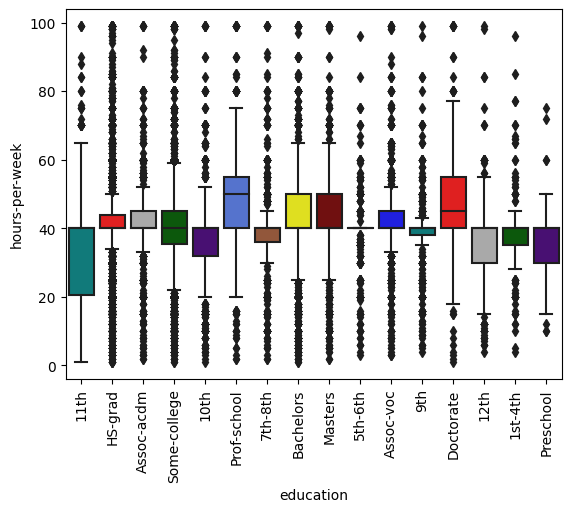

----------------- INCOME --------------------------------


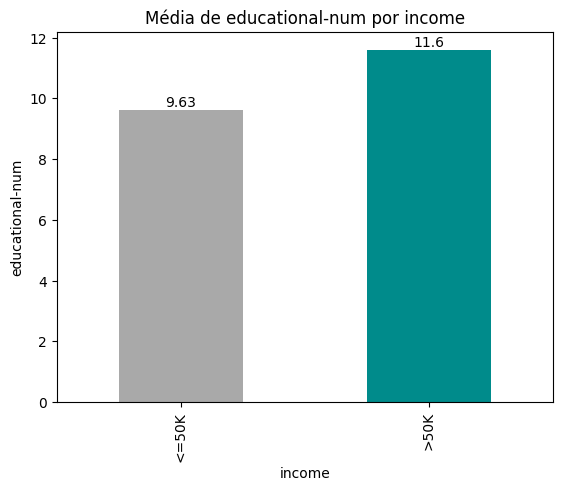

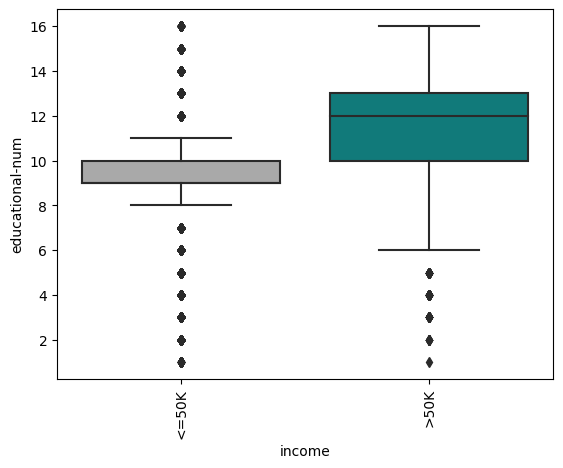

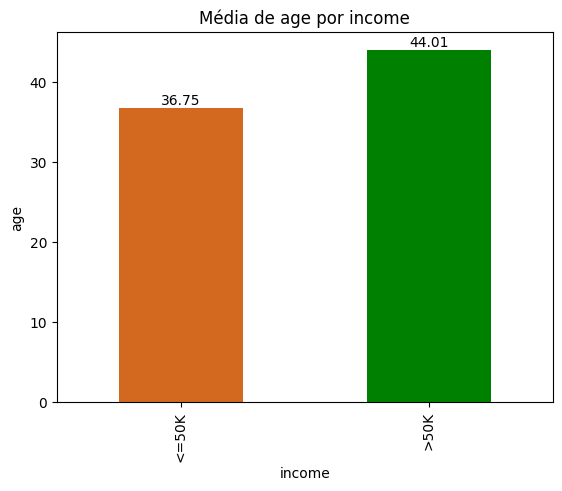

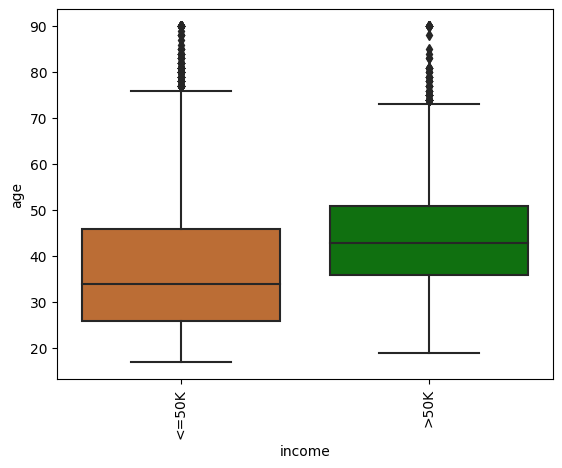

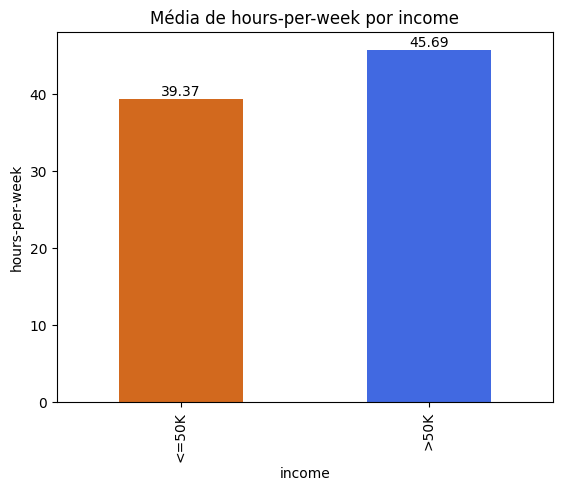

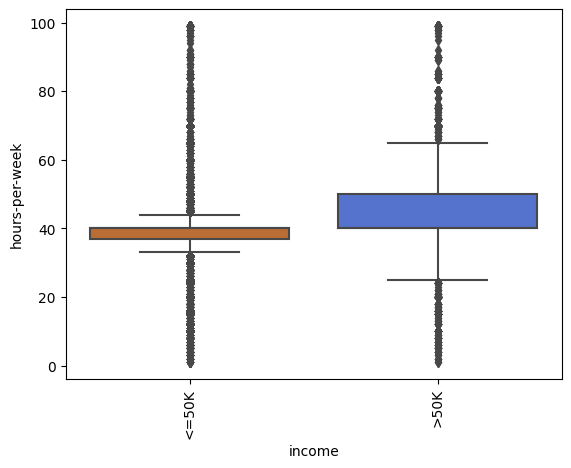

----------------- USA_NATIONAL --------------------------------


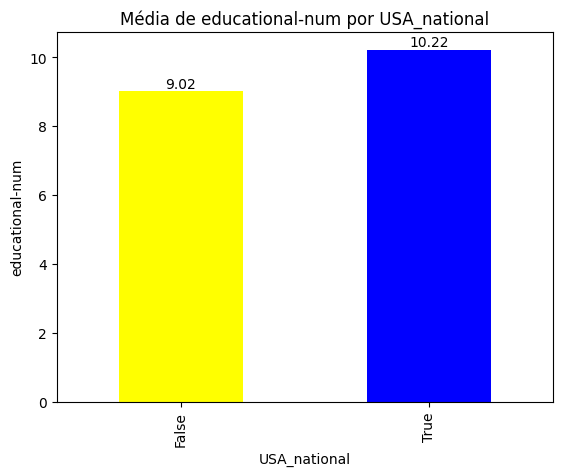

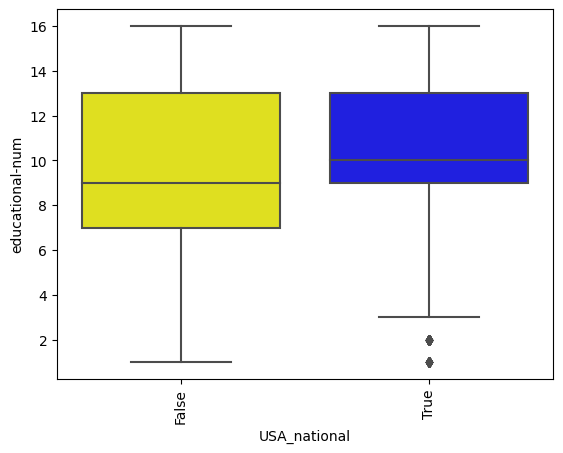

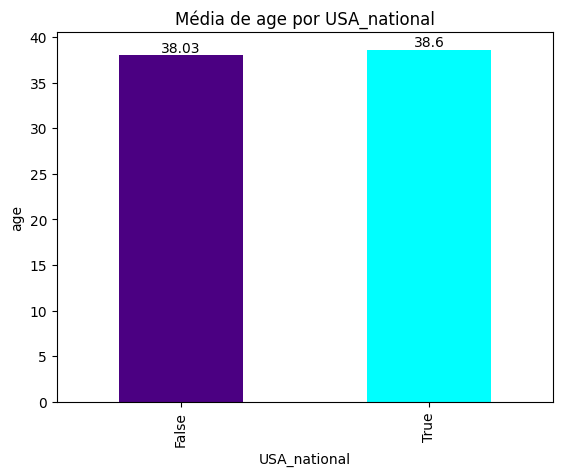

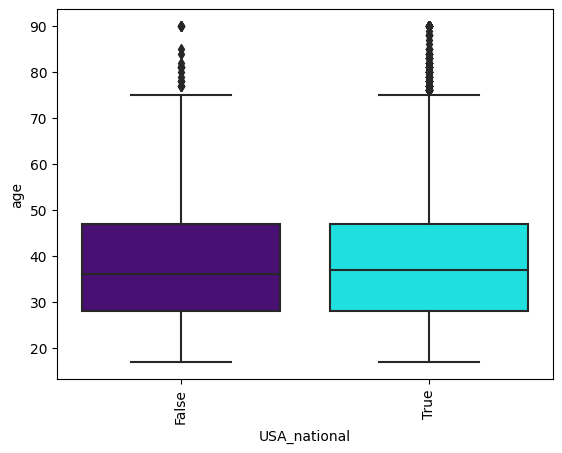

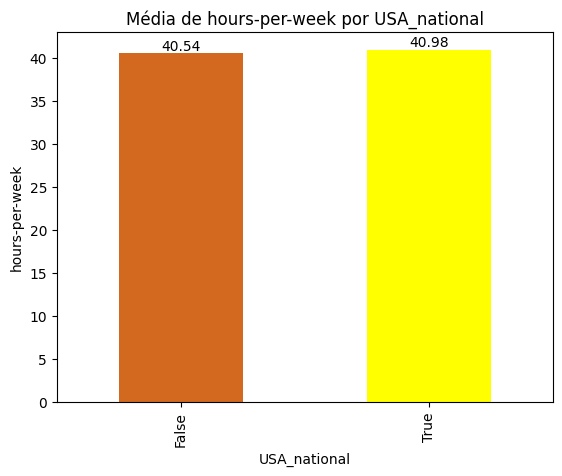

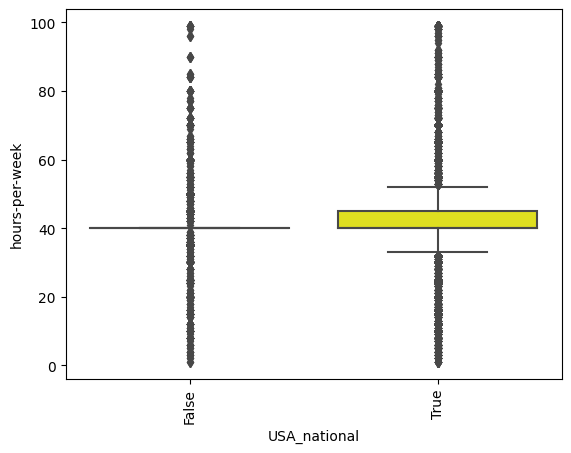

In [31]:
## Grafico da media de cada atributo quantitativo/ lista escolhida de atributos qualitativos
grupo2=['educational-num','age','hours-per-week']
for i in lista_atributos_qualitativos:
    print ("-----------------", i.upper(), "--------------------------------")
    
    for j in grupo2:
        
        cores_grafico_random=random.sample(cores_grafico,11) # gera um lista de cores randomicas de acordo com o nr de classes
    #########
        media_grupo=DF.groupby(i)[j].mean()
        media_grupo.plot(kind="bar", color=cores_grafico_random)
        desloc_rotulo=round(media_grupo.max(),2)
        for k, v in enumerate(media_grupo):
              plt.text(k,v+desloc_rotulo*0.02, str(round(v,2)), color='black', ha='center', va='center')   
        plt.xlabel(i)
        plt.ylabel(j)
        plt.title (f'Média de {j} por {i}')
        plt.show() 
        sns.boxplot(x=i,y=j, data=DF, palette=cores_grafico_random)
        plt.xticks(rotation=90)
        plt.show()

# SEGUNDA FASE

preparacao de dados
modelos:
    LR
    KNN
    SVM
    NB
    ARVORES
    RF
    *CLUSTER, OUTROS MODELOS QUE APLICAR
Seleção de Modelos e Redução de Dimensionalidade
Comparaçao dos modelos (estudo comparativo)
Modelo em produção: Streamlit



## Preparacao dos dados